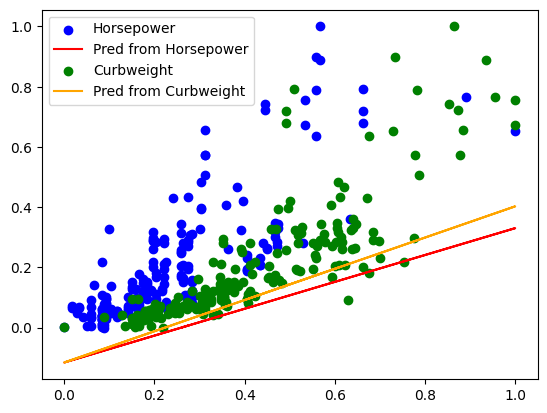

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"D:\OneDrive\Desktop\First Semester\MrM Research\Coding\Data\Linear Regression Dataset\CarPrices\CarPrice_Assignment.csv")
x1=data["horsepower"]
x2=data["curbweight"]
y=data["price"]
#y=mx+b
x1_min = x1.min()
x1_max = x1.max()
x2_min = x2.min()
x2_max = x2.max()
y_min = y.min()
y_max = y.max()

# Convert to 0-1 range
x1_scaled = (x1 - x1_min) / (x1_max - x1_min)
x2_scaled = (x2 - x2_min) / (x2_max - x2_min)
y_scaled = (y - y_min) / (y_max - y_min)
x_dash = np.array([x1_scaled, x2_scaled]).T  # .T to get shape (n_samples, 2)

m_dash = np.array([0.0, 0.0])
b = 0.0
L = 0.5
epochs = 125
error=[]
for i in range(epochs):
    y_dash = np.dot(x_dash, m_dash) + b
    squared_errors = (y_dash - y_scaled) ** 2
    mse = np.mean(squared_errors) / 2
    error.append(mse)
    
    # Gradients
    y_scaled_np = y_scaled.to_numpy()  # convert Series to NumPy array
    D_m = np.mean((y_dash - y_scaled_np)[:, None] * x_dash, axis=0)
    D_b = np.mean(y_dash - y_scaled_np)
    
    # Update weights and bias
    m_dash = m_dash - L * D_m
    b = b - L * D_b

# Prediction for plotting purposes
y_pred1 = m_dash[0] * x1_scaled + b
y_pred2 = m_dash[1] * x2_scaled + b

plt.scatter(x1_scaled, y_scaled, color='blue', label='Horsepower')
plt.plot(x1_scaled, y_pred1, color='red', label='Pred from Horsepower')

plt.scatter(x2_scaled, y_scaled, color='green', label='Curbweight')
plt.plot(x2_scaled, y_pred2, color='orange', label='Pred from Curbweight')

plt.legend()
plt.show()


In [49]:
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


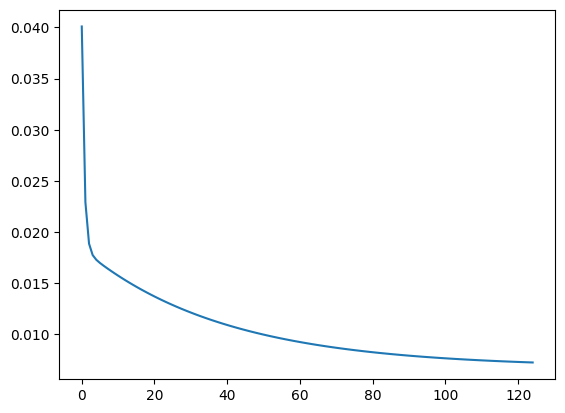

In [39]:
plt.plot(range(epochs), error)

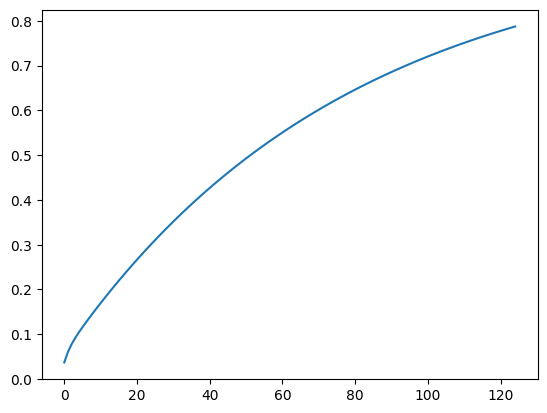

In [40]:
plt.plot(range(epochs), m_v)